In [31]:
import pandas as pd
import cufflinks as cf
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression


# Leemos el dataset y definimos variable

In [32]:
thegrefG= pd.read_csv("Downloads/Advertising.csv")
thegrefG

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# sacamos columnas y filas

In [33]:
thegrefG.shape

(200, 4)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

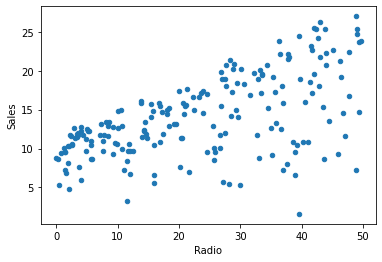

In [34]:
thegrefG.plot.scatter(x="Radio", y="Sales")

# definimos regresion linear

In [35]:
reg = LinearRegression()
reg.fit(thegrefG[["Radio"]], thegrefG["Sales"])

LinearRegression()

In [36]:
reg.predict([[25],[50]])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([14.37403268, 19.43642726])

In [37]:
print(f"la línea intersecta en : {reg.intercept_} y tiene una pendiente de {reg.coef_}")

la línea intersecta en : 9.311638095158283 y tiene una pendiente de [0.20249578]


In [38]:
 reg.coef_ * thegrefG["Radio"] + reg.intercept_

0      16.965979
1      17.269722
2      18.606195
3      17.674714
4      11.498593
         ...    
195    10.060872
196    10.303867
197    11.194849
198    17.816461
199    11.053102
Name: Radio, Length: 200, dtype: float64

# predecimos las ventas de Radio

In [39]:
pred = pd.Series(reg.predict(thegrefG[["Radio"]]))
pred

0      16.965979
1      17.269722
2      18.606195
3      17.674714
4      11.498593
         ...    
195    10.060872
196    10.303867
197    11.194849
198    17.816461
199    11.053102
Length: 200, dtype: float64

# representamos la prediccion en la tabla

In [40]:
thegrefG["Pred. Radio"] = pred
thegrefG

,TV,Radio,Newspaper,Sales,Pred. Radio
0,230.1,37.8,69.2,22.1,16.965979
1,44.5,39.3,45.1,10.4,17.269722
2,17.2,45.9,69.3,9.3,18.606195
3,151.5,41.3,58.5,18.5,17.674714
4,180.8,10.8,58.4,12.9,11.498593
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,10.060872
196,94.2,4.9,8.1,9.7,10.303867
197,177.0,9.3,6.4,12.8,11.194849
198,283.6,42.0,66.2,25.5,17.816461


# graficamos con línea para ver la precisión de la predicción

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

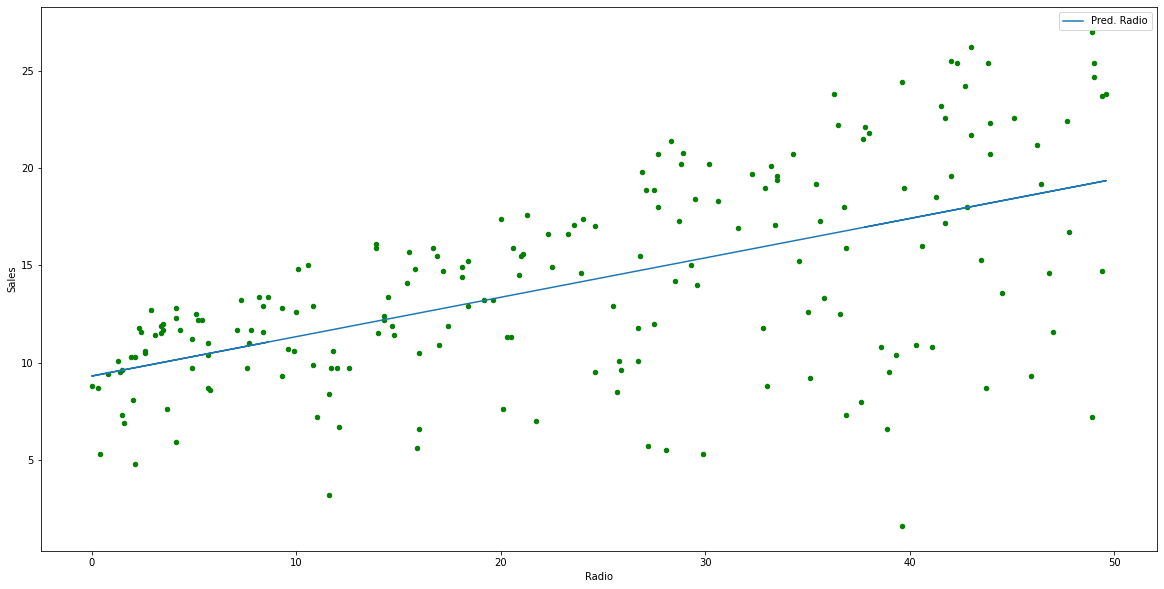

In [43]:
ax = thegrefG.plot.line(x="Radio", y="Pred. Radio")
thegrefG.plot.scatter(x="Radio", y="Sales", ax= ax, color="green", figsize=(20,10))